# Identifier les clients à fort potentiel du programme de fidélité - Canada Flight

## **Objectif** : Identifier les facteurs clés qui différencient les clients engagés des désengagés

# **2. Visualisation exploratoire**

In [1]:
# Importation des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Lecture du fichier 
customer_flight = pd.read_csv("customer_flight.csv")
customer_flight

,loyalty_number,province,gender,education,salary,marital_status,loyalty_card,customer_lifetime_value,enrollment_type,total_flights,engagement_status,lifespan,enrollment_date
0,100018,Alberta,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,46,Engaged,2,2016-08-01
1,100102,Ontario,Male,College,66801.5,Single,Nova,2887.74,Standard,51,Engaged,5,2013-03-01
2,100140,British Columbia,Female,College,67178.0,Divorced,Nova,2838.07,Standard,47,Engaged,2,2016-07-01
3,100214,British Columbia,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,22,Engaged,3,2015-08-01
4,100272,Ontario,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,37,Engaged,4,2014-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14665,999902,Ontario,Male,College,66801.5,Married,Aurora,7290.07,Standard,50,Engaged,4,2014-05-01
14666,999911,Newfoundland,Male,Doctor,217943.0,Single,Nova,8564.77,Standard,0,Disengaged,6,2012-08-01
14667,999940,Quebec,Female,Bachelor,47670.0,Married,Nova,20266.50,Standard,18,Disengaged,1,2017-07-01
14668,999982,British Columbia,Male,College,66801.5,Married,Star,2631.56,Standard,6,Disengaged,0,2018-07-01


## **2.1 Vue globale / performance entreprise**

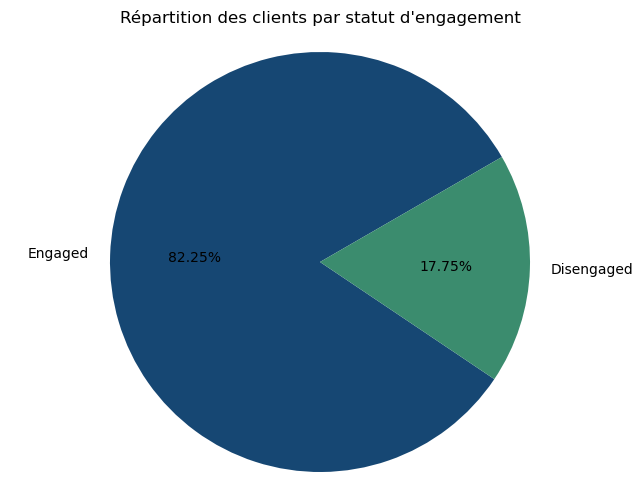

In [3]:
# Répartition des clients par statut
customer_status = customer_flight["engagement_status"].value_counts()
plt.figure(figsize=(8,6))
plt.title("Répartition des clients par statut d'engagement")
plt.pie(customer_status, labels=customer_status.index, autopct="%.2f%%", startangle=30, colors=["#164773","#3B8C6E"])
plt.axis("equal")

plt.savefig("Répartition des clients par statut.png", dpi=300, bbox_inches="tight")
plt.show()

La majorité des clients inscrits sont des clients engagés (82%), près de 18% des clients sont désengagés (< 20 vols)

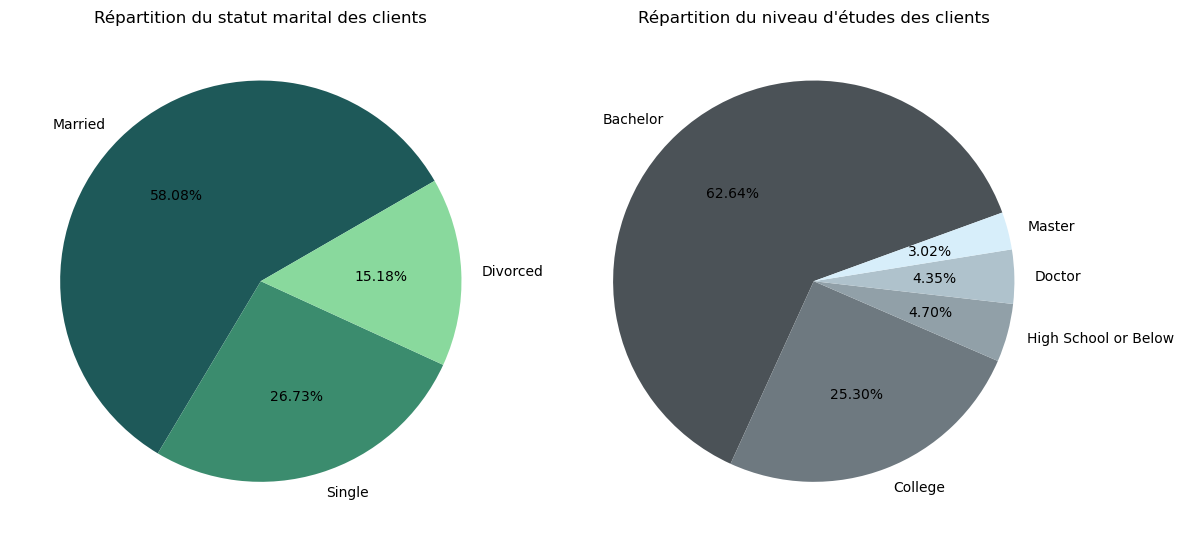

In [5]:
# Répartition du statut marital et niveau d'études
fig, ax = plt.subplots(1,2, figsize=(12,8))
ax1= customer_flight["marital_status"].value_counts()
ax1.plot(kind ="pie", labels=ax1.index, ax=ax[0], colors=["#1E5959","#3B8C6E","#89D99D"], autopct="%.2f%%", startangle=30)
ax[0].set_title("Répartition du statut marital des clients")
ax[0].set_ylabel("")
ax[0].set_aspect("equal")

ax2=customer_flight["education"].value_counts()
ax2.plot(kind ="pie", labels=ax2.index, autopct="%.2f%%", startangle=20, ax= ax[1], colors=["#4B5257","#6E7980","#91A0A8","#AFC2CC","#D7EEFA"])
ax[1].set_title("Répartition du niveau d'études des clients")
ax[1].set_ylabel("")
ax[1].set_aspect("equal")

plt.tight_layout()
plt.savefig("Répartition statut marital_études des clients.png", dpi=300, bbox_inches="tight")
plt.show()

La clientèle principale est mariée, suivie par les célibataires avec près de 27% et les divorcés avec 15%\
Concernant le niveau d'études, plus de la majorité des clients ont un niveau Bac suivi par les clients ayant un niveau licence.\
Moins de 5 % de la clientèle a un niveau lycée ou moins, doctorat ou master.

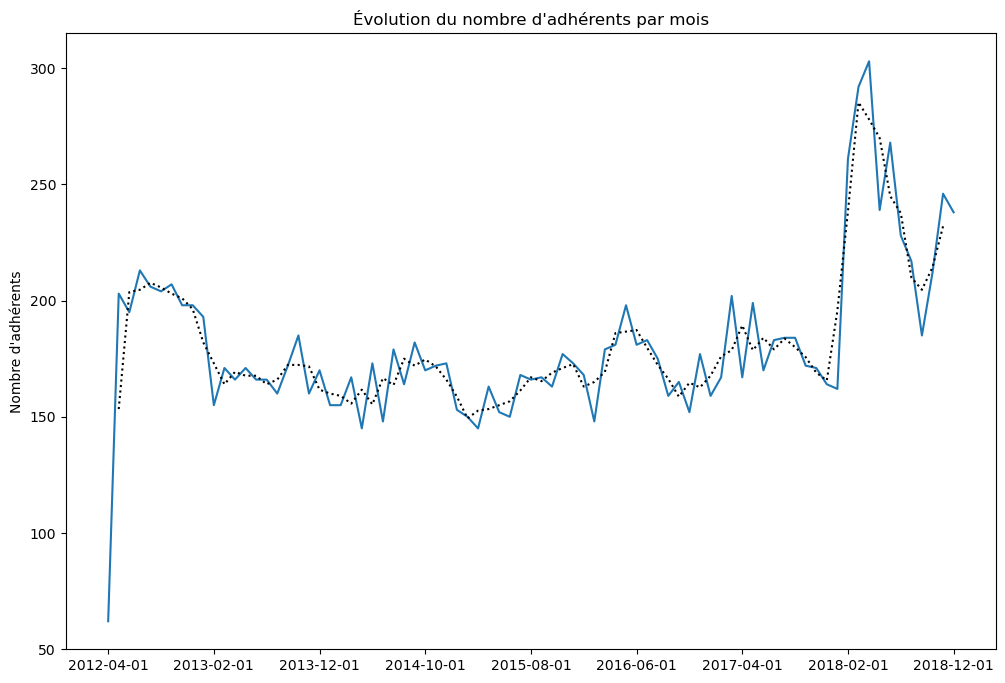

In [6]:
# Évolution des engagements 
enrollment_date = customer_flight["enrollment_date"].value_counts().sort_index()
plt.figure(figsize=(12,8))
enrollment_date.plot(kind="line", title="Évolution du nombre d'adhérents par mois")
enrollment_date.rolling(3, center=True).mean().plot(ls=":", color="k", label="Moyenne mobile")
plt.ylabel("Nombre d'adhérents")
plt.xlabel("")

plt.savefig("Évolution du nombre d'adhérents par moi.png", dpi=300, bbox_inches="tight")
plt.show()


On observe un nombre d'adhérents entre 150 et 200 engagements par mois. Une hause du nombre d'adhérents à eu lieu en 2018 notamment en juin avec plus de 350 adhérents suite à l'offre promotionnelle mise en place

In [7]:
# Indicateurs clés de performance
print("Nombre total de clients :",len(customer_flight))
print("CLV moyen :",round(customer_flight["customer_lifetime_value"].mean(),2))
print("Moyenne des vols par client :",round(customer_flight["total_flights"].mean()))
print("Moyenne d'ancienneté par client :",round(customer_flight["lifespan"].mean(),1))

Nombre total de clients : 14670
CLV moyen : 7968.76
Moyenne des vols par client : 33
Moyenne d'ancienneté par client : 2.7


### **2.1 Analyse des facteurs sociodémographique des clients selon les statuts**

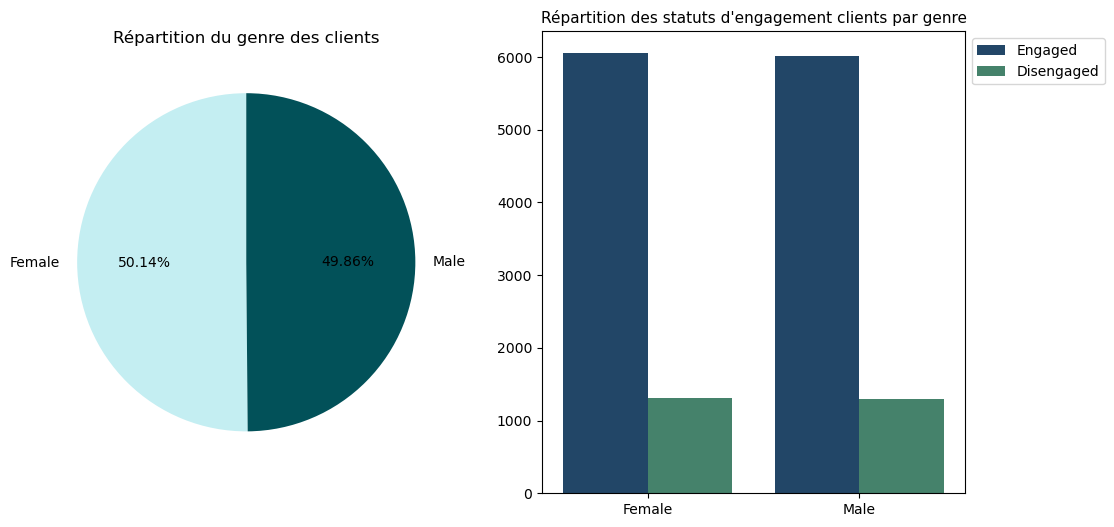

In [8]:
# Répartition du genre des clients
fig, ax =plt.subplots(1,2, figsize=(12,6))
ax1 = customer_flight["gender"].value_counts()
ax1.plot(kind="pie", labels= ax1.index, autopct="%.2f%%", startangle=90, ax= ax[0], colors=["#C4EEF2","#025159"])
ax[0].set_title("Répartition du genre des clients")
ax[0].set_ylabel("")

# Répartition des statuts par genre
sns.countplot(customer_flight, x="gender", hue="engagement_status", palette=["#164773","#3B8C6E"], ax=ax[1])
ax[1].set_title("Répartition des statuts d'engagement clients par genre", fontsize=11)
ax[1].legend(bbox_to_anchor=(1,1))
ax[1].set_ylabel("")
ax[1].set_xlabel("")

plt.savefig("Genre des clients par statut.png", dpi=300, bbox_inches="tight")

plt.show()

Il y a autant d'hommes que de femmes au sein de la clientèle\
On observe que les effectifs par statut sont quasiment identique chez les femmes et les hommes 

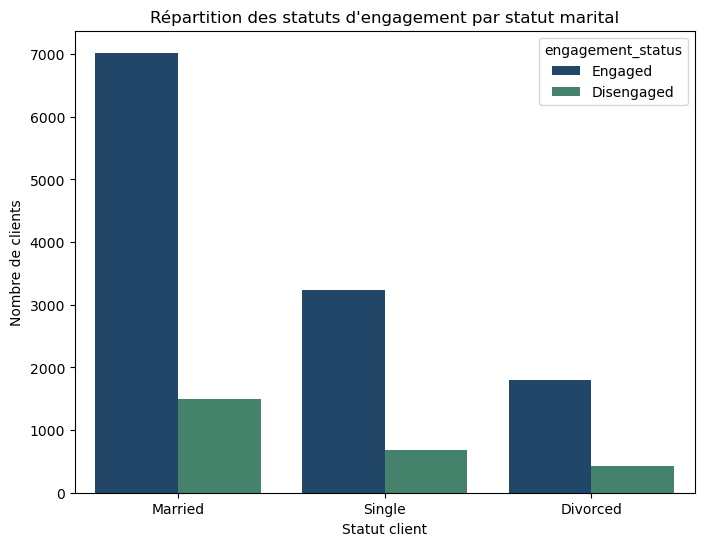

In [9]:
# Répartition du statut matrimonial par statut
plt.figure(figsize=(8,6))
sns.countplot(customer_flight, x="marital_status", hue="engagement_status", palette=["#164773","#3B8C6E"])
plt.title("Répartition des statuts d'engagement par statut marital")
plt.ylabel("Nombre de clients")
plt.xlabel("Statut client")

plt.savefig("Statut marital par statut d'engagement.png", dpi=300, bbox_inches="tight")
plt.show()

On observe que plus le statut marital est représenté au sein de la clientèle plus les effectifs par statut sont élevés \
On constate également une tendance uniforme des statuts parmi les statuts maritaux (Les clients engagés sont largement dominants quelque soit le statut marital)

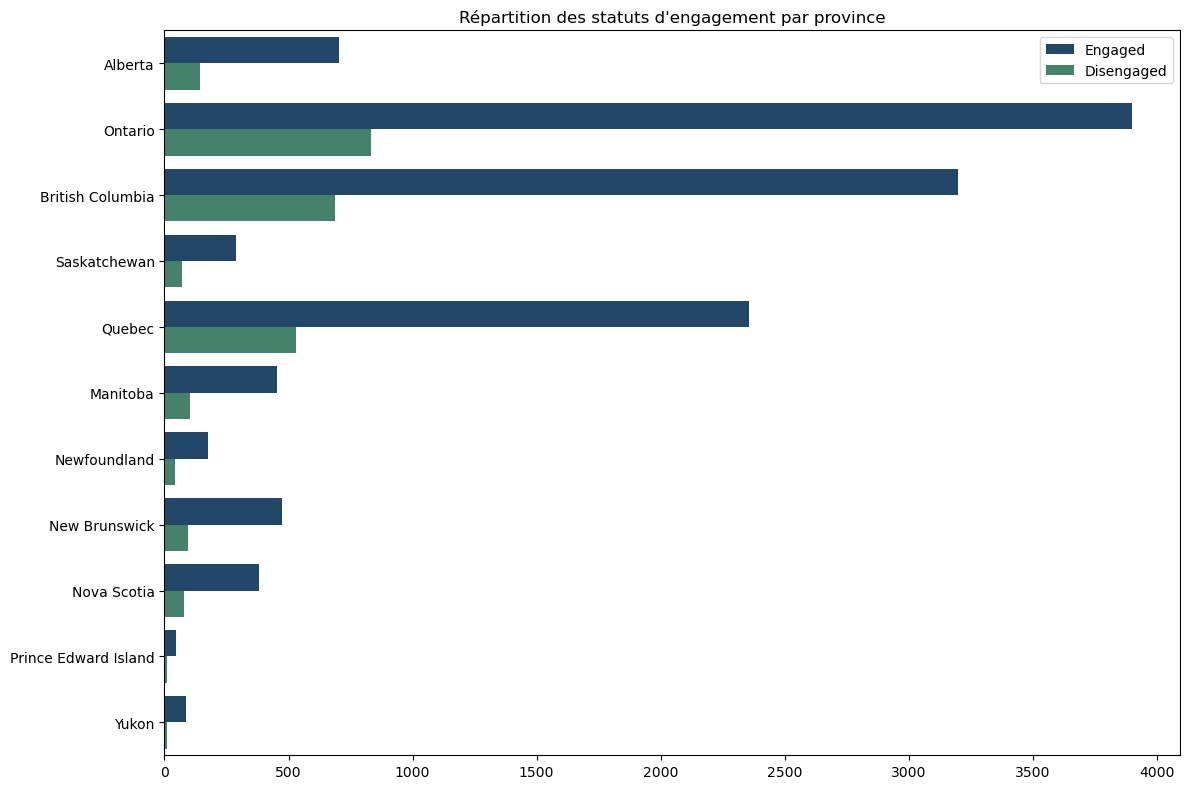

In [10]:
# Répartition des statuts clients par Province 
plt.figure(figsize=(12,8))
sns.countplot(customer_flight, y="province", hue="engagement_status", palette=["#164773","#3B8C6E"])
plt.title("Répartition des statuts d'engagement par province")
plt.ylabel("")
plt.xlabel("")
plt.legend(bbox_to_anchor=(1,1))
plt.tight_layout()

plt.savefig("Répartition des statuts par province.png", dpi=300, bbox_inches="tight")
plt.show()

La majorité des clients se trouvent dans les provinces les plus peuplées (Ontario, British Colombia, Québec).\
On observe pour chaque province, que les clients engagés sont largement majoritaires,
Cela montre également que les différents statuts clients sont réparties sur l'ensemble des provinces

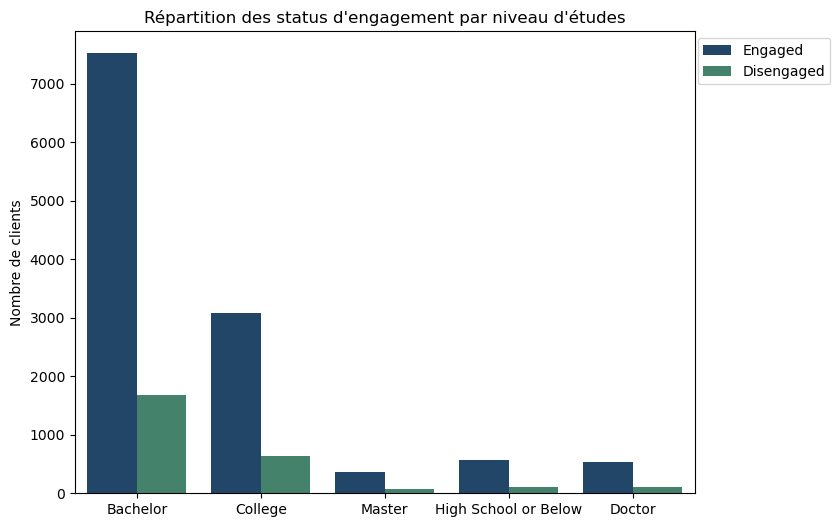

In [40]:
# Répartition des statuts clients par niveau d'études
plt.figure(figsize=(8,6))
sns.countplot(customer_flight, x="education", hue="engagement_status", palette=["#164773","#3B8C6E"])
plt.title("Répartition des statuts d'engagement par niveau d'études")
plt.ylabel("Nombre de clients")
plt.xlabel("")
plt.legend(bbox_to_anchor=(1.23,1))

plt.savefig("Niveau d'études par statut.png", dpi=300, bbox_inches="tight")
plt.show()

On observe que plus le niveau d'études est représenté au sein de la clientèle plus les effectifs par statut d'engagement sont élevés.\
Les statuts sont uniforment par niveau d'éducation, les clients engagés sont largement dominants. Les clients désengagés représentent systématiquement les effectifs les moins nombreux pour chaque niveau d'études.

## **2.2 Activité selon profil**

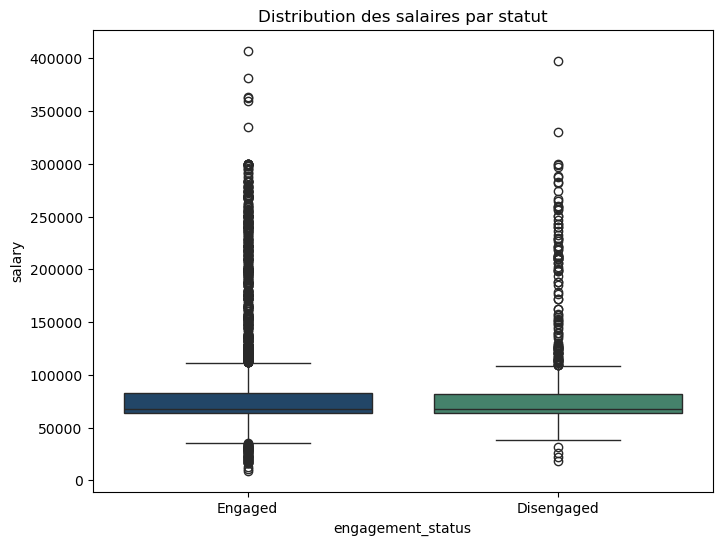

In [11]:
# Distribution du salaire par statut d'engagement
plt.figure(figsize=(8,6))
sns.boxplot(customer_flight, x="engagement_status", y="salary",hue="engagement_status", palette=["#164773","#3B8C6E"])
plt.title("Distribution des salaires par statut")

plt.savefig("Distribution des salaires par statut.png", dpi=300, bbox_inches="tight")
plt.show()

La distribution des salaires est semblable pour chaque statut. Un salaire médian de 70 000 dollars pour chaque statut, ainsi que de nombreux outliers qui révèlent une clientèle diversifiée en termes de salaire pour chaque statut. 

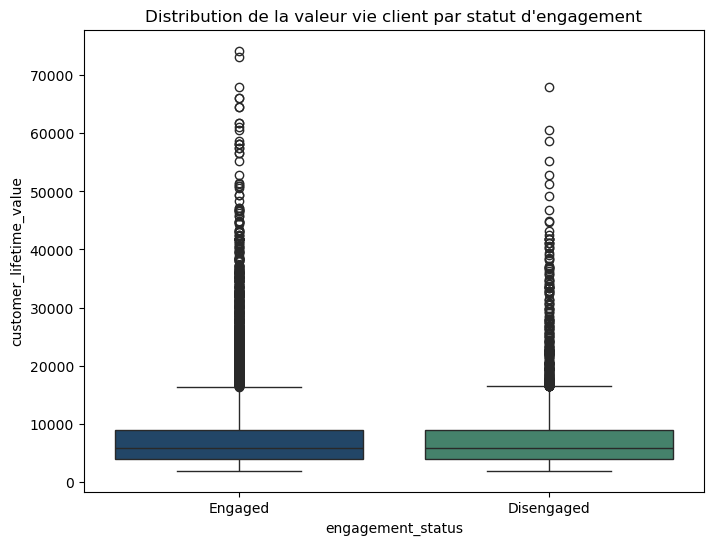

In [12]:
# Distribution de la valeur vie client par statut
plt.figure(figsize=(8,6))
sns.boxplot(customer_flight, x="engagement_status", y="customer_lifetime_value", hue="engagement_status", palette=["#164773","#3B8C6E"])
plt.title("Distribution de la valeur vie client par statut d'engagement")

plt.savefig("Distribution de la valeur vie client par statut.png", dpi=300, bbox_inches="tight")
plt.show()

Idem une distribution relativement stable de la Valeur Vie Client. Une médiane autour de 5000 dollars pour chaque statut\
De nombreux outliers également par statut qui révèlent une hétérogénéité des clients par statut.\
Les clients qui sont désengagés aujourd'hui ont eu une valeur vie client non négligeable dans le passé

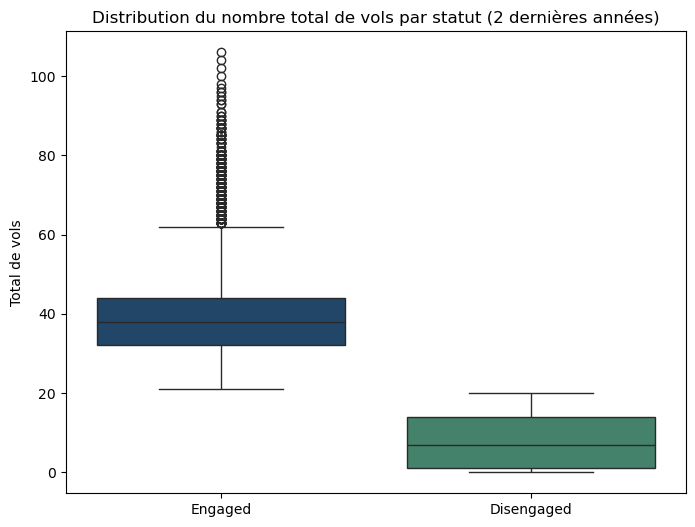

In [13]:
# Distribution du nombre de vols par statut
plt.figure(figsize=(8,6))
sns.boxplot(customer_flight, x="engagement_status", y="total_flights", hue="engagement_status", palette=["#164773","#3B8C6E"])
plt.title("Distribution du nombre total de vols par statut (2 dernières années)")
plt.ylabel("Total de vols")
plt.xlabel("")

plt.savefig("Distribution du nombre de vols par statut.png", dpi=300, bbox_inches="tight")
plt.show()

une distribution plus étalée pour les clients actifs avec une médiane autour de 40 vols. 
Les désengagés ont une médiane plus faible aux alentours de 10 ainsi qu'une répartition plus concentrée entre 0 et 20 vols

### **2.3 Engagement client**

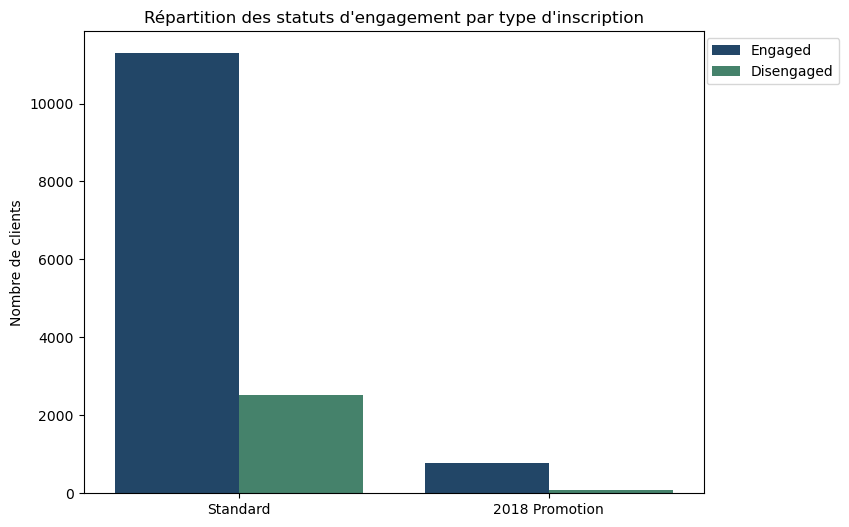

In [14]:
# Répartition des statuts d'engagement par type d'inscription
plt.figure(figsize=(8,6))
sns.countplot(customer_flight, x="enrollment_type", hue="engagement_status", palette=["#164773","#3B8C6E"])
plt.title("Répartition des statuts d'engagement par type d'inscription")
plt.ylabel("Nombre de clients")
plt.xlabel("")
plt.legend(bbox_to_anchor=(1.23,1))

plt.savefig("Répartition des statuts par type d'inscription.png", dpi=300, bbox_inches="tight")
plt.show()

Les clients sont majoritairement engagés via le processus standard.
Suite à la promotion récente, on observe une part relativement faible de clients désengagés

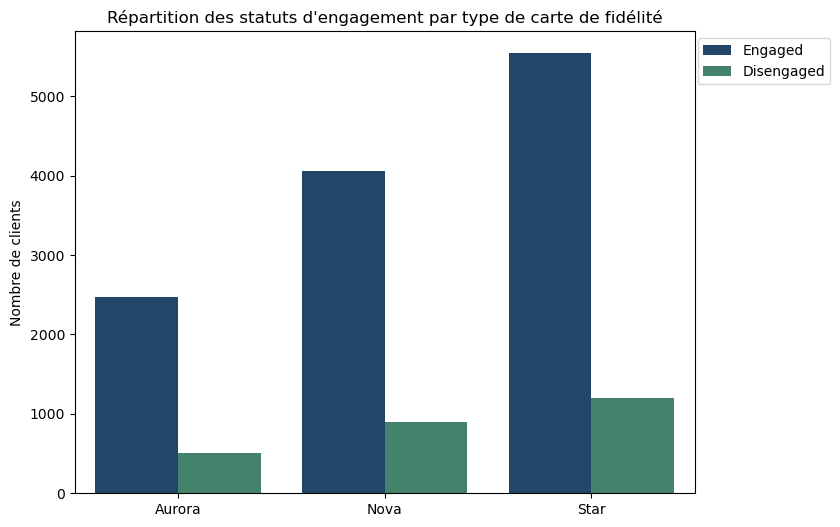

In [15]:
# Répartition des statuts d'engagement par type de carte de fidélité
plt.figure(figsize=(8,6))
sns.countplot(customer_flight, x="loyalty_card", hue="engagement_status", palette=["#164773","#3B8C6E"])
plt.title("Répartition des statuts d'engagement par type de carte de fidélité")
plt.ylabel("Nombre de clients")
plt.xlabel("")
plt.legend(bbox_to_anchor=(1.23,1))

plt.savefig("Répartition des statuts selon le type carte fidélité.png", dpi=300, bbox_inches="tight")
plt.show()

La carte standard (Star) concentre la majorité des clients, suivie par la carte Nova et Aurora.
On observe une tendance uniforme des statuts, la clientèle engagée qui est majoritairement dominante quelque soit le type de carte.

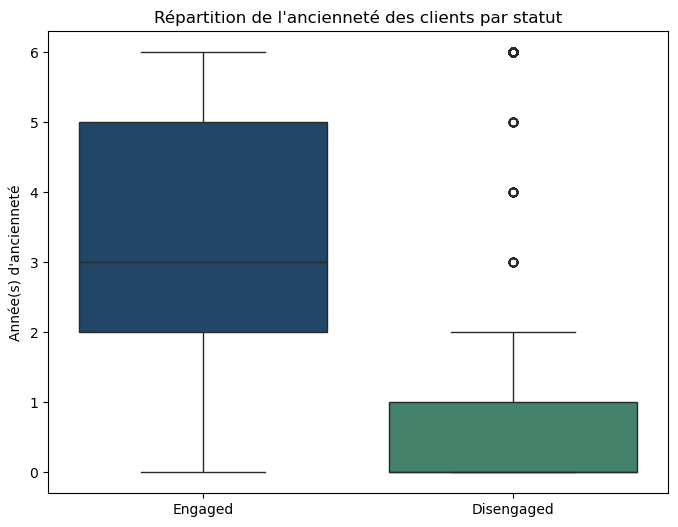

In [17]:
# Répartition de l'ancienneté des clients par statut
plt.figure(figsize=(8,6))
sns.boxplot(customer_flight, x="engagement_status", y="lifespan", hue="engagement_status", palette=["#164773","#3B8C6E"])
plt.title("Répartition de l'ancienneté des clients par statut")
plt.ylabel("Année(s) d'ancienneté")
plt.xlabel("")

plt.savefig("Ancienneté des clients par statut.png", dpi=300, bbox_inches="tight")
plt.show()

On observe une relation entre l'ancienneté et le statut d'engagement.\
-La clientèle active est la plus ancienne avec une médiane de 3 ans, elle est bien répartie (0 à 6 ans).\
-Les désengagés sont majoritairement des clients récents, une ancienneté inférieure ou égale à 2 ans.\
-On observe quelques outliers avec une ancienneté supérieure ou égale à 3 ans pour les clients désengagés.